In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

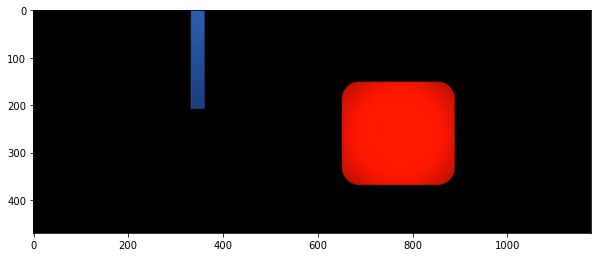

In [2]:
image_base = cv2.imread('base.png')
image_base = cv2.cvtColor(image_base, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(image_base); plt.show();

# Teste corte contorno

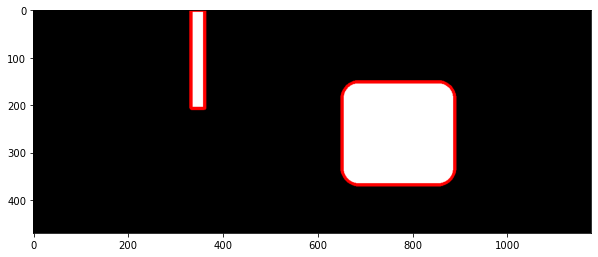

In [3]:
img_hsv = cv2.cvtColor(image_base, cv2.COLOR_BGR2HSV)

image_lower = np.array([0, 150, 50])  
image_upper = np.array([255, 255, 255])
mask_hsv = cv2.inRange(img_hsv, image_lower, image_upper)

contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
contornos_img = mask_rgb.copy() # Cópia da máscara para ser desenhada "por cima"
cv2.drawContours(contornos_img, contornos, -1, [255, 0, 0], 5);
plt.figure(figsize = (10,10))  
plt.imshow(contornos_img);

# Teste dilatação + erosão

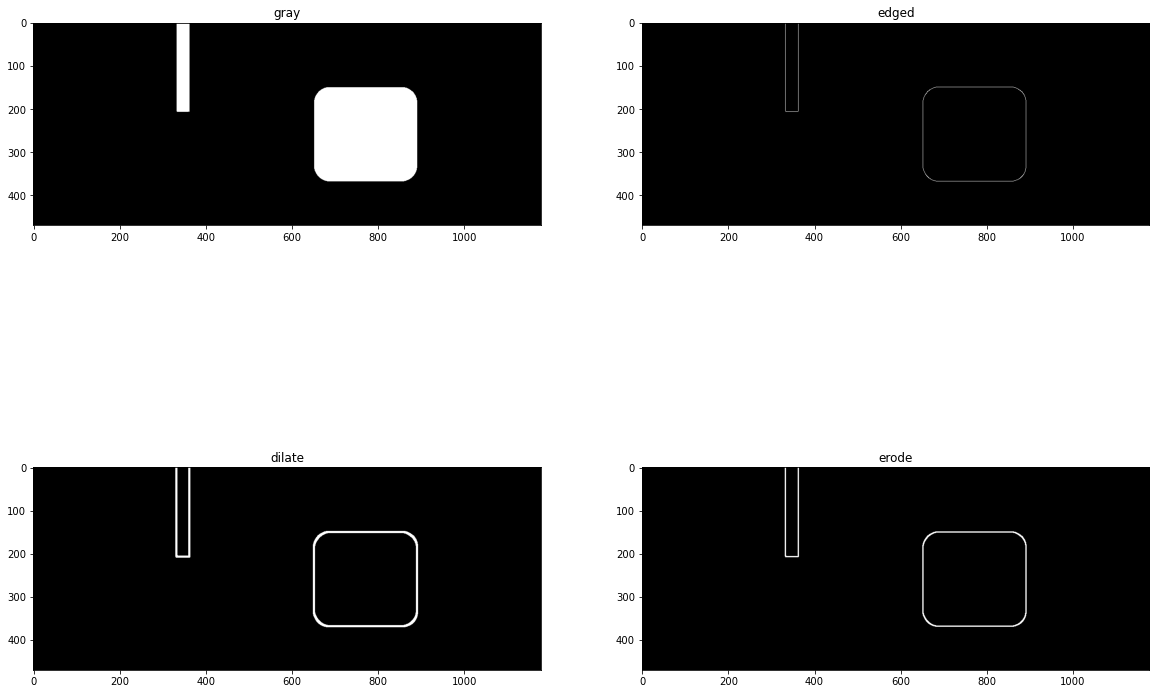

In [4]:
#carregamos a imagem, convertemos para níveis de cinza e a borramos levemente
quadradoSeparado = cv2.cvtColor(mask_hsv, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(quadradoSeparado, cv2.COLOR_BGR2GRAY)

#calculamos as arestas e realizamos uma dilatação + erosão para fechar
#eventuais gaps entre as arestas dos objetos
edged = cv2.Canny(gray, 50, 150)
dilate = cv2.dilate(edged, None, iterations=2)
erode = cv2.erode(dilate, None, iterations=1)

plt.figure(figsize = (20,15))
plt.subplot(2, 2, 1), plt.imshow(gray, 'gray'), plt.title('gray')
plt.subplot(2, 2, 2), plt.imshow(edged, 'gray'), plt.title('edged')
plt.subplot(2, 2, 3), plt.imshow(dilate, 'gray'), plt.title('dilate')
plt.subplot(2, 2, 4), plt.imshow(erode, 'gray'), plt.title('erode')
plt.show();


# Pega contorno na imagem

In [5]:
cnts, _ = cv2.findContours(erode.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

(cnts, boundingBoxes) = zip(*sorted(zip(cnts, [cv2.boundingRect(c) for c in cnts]), key=lambda b: b[1][0], reverse=False))

# Teste na imagem

888.5
51936.0


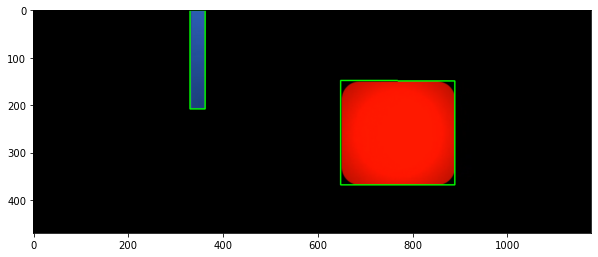

In [6]:

orig = image_base.copy()

#Percorre todos os contornos
for c in cnts:
    
    
    
  # se o contorno não é suficientemente grande, ignorá-lo
    if cv2.contourArea(c) > 1:
        area = cv2.contourArea(c)
        print(area) 
        box = cv2.minAreaRect(c)
        box = cv2.boxPoints(box) 
        box = np.array(box, dtype="int")

        cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)



plt.figure(figsize = (10,10))
plt.imshow(orig); plt.show();


# teste todas as celulas juntas

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# antes da barreira
image_base = cv2.imread('base.png')
img_hsv = cv2.cvtColor(image_base.copy(), cv2.COLOR_BGR2HSV)
image_base = cv2.cvtColor(image_base, cv2.COLOR_BGR2RGB)

In [8]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# depois da barreira
image_base = cv2.imread('basep.png')
img_hsv = cv2.cvtColor(image_base.copy(), cv2.COLOR_BGR2HSV)
image_base = cv2.cvtColor(image_base, cv2.COLOR_BGR2RGB)

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# tentar calcular colisão
image_base = cv2.imread('basec.png')
img_hsv = cv2.cvtColor(image_base.copy(), cv2.COLOR_BGR2HSV)
image_base = cv2.cvtColor(image_base, cv2.COLOR_BGR2RGB)

In [9]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

# tentar calcular colisão
image_base = cv2.imread('basec1.png')
img_hsv = cv2.cvtColor(image_base.copy(), cv2.COLOR_BGR2HSV)
image_base = cv2.cvtColor(image_base, cv2.COLOR_BGR2RGB)

box vermelho [[115 207]
 [356 207]
 [356 427]
 [115 427]]
box azul [[390 449]
 [421 449]
 [421 729]
 [390 729]]


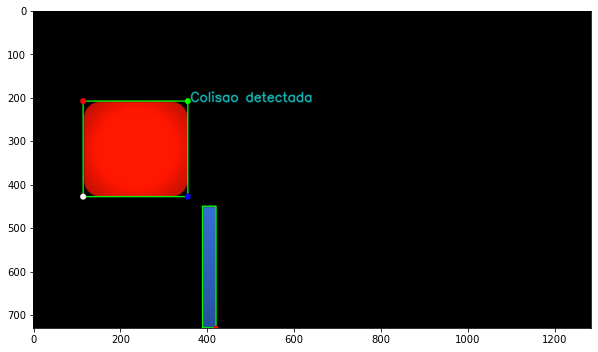

In [9]:
# isolando forma geométrica vermelha   
image_lower_vermelha = np.array([0, 215, 70])  
image_upper_vermelha = np.array([255, 255, 255])
mask_hsv_vermelha = cv2.inRange(img_hsv, image_lower_vermelha, image_upper_vermelha)

edged_vermelha = cv2.Canny(mask_hsv_vermelha, 50, 150)
dilate_vermelha = cv2.dilate(edged_vermelha, None, iterations=2)
erode_vermelha = cv2.erode(dilate_vermelha, None, iterations=1)
    
# contorno camada vermelha
cnts_vermelha, _ = cv2.findContours(erode_vermelha.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
(cnts_vermelha, boundingBoxes) = zip(*sorted(zip(cnts_vermelha, [cv2.boundingRect(c) for c in cnts_vermelha]), key=lambda b: b[1][0], reverse=False))
    
    
    
# isolando forma geométrica azul
image_lower_azul = np.array([100, 150, 100])  
image_upper_azul = np.array([150, 200, 250]) 
mask_hsv_azul = cv2.inRange(img_hsv, image_lower_azul, image_upper_azul)
    
edged_azul = cv2.Canny(mask_hsv_azul, 50, 150)
dilate_azul = cv2.dilate(edged_azul, None, iterations=2)
erode_azul = cv2.erode(dilate_azul, None, iterations=1)
    
# contorno camada azul
cnts_azul, _ = cv2.findContours(erode_azul.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
(cnts_azul, boundingBoxes) = zip(*sorted(zip(cnts_azul, [cv2.boundingRect(c) for c in cnts_azul]), key=lambda b: b[1][0], reverse=False))

c_v = cnts_vermelha[0] 
c_a = cnts_azul[0] 
    
orig = image_base.copy()


box_vermelha = cv2.minAreaRect(c_v)
box_vermelha = cv2.boxPoints(box_vermelha) 
box_vermelha = np.array(box_vermelha, dtype="int")
print("box vermelho",box_vermelha)

cv2.drawContours(orig, [box_vermelha.astype("int")], -1, (0, 255, 0), 2)

box_azul = cv2.minAreaRect(c_a)
box_azul = cv2.boxPoints(box_azul) 
box_azul = np.array(box_azul, dtype="int")
print("box azul",box_azul)

cv2.drawContours(orig, [box_azul.astype("int")], -1, (0, 255, 0), 2)    


x = box_azul[2][0]
y = box_azul[2][1]
cv2.circle(orig, (int(x), int(y)), 5, (255, 0, 0), -1)

if ((box_azul[2][1] >= box_vermelha[0][1]) or (box_azul[0][1] >= box_vermelha[2][1])):  
    origem_area = (362 ,  208)
    font_area = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(orig, str("Colisao detectada"), origem_area, font_area,1,(20, 184, 184),2,cv2.LINE_AA)
    


x1 = box_vermelha[0][0]
y1 = box_vermelha[0][1]
cv2.circle(orig, (int(x1), int(y1)), 7, (255, 0, 0), -1)

x1 = box_vermelha[1][0]
y1 = box_vermelha[1][1]
cv2.circle(orig, (int(x1), int(y1)), 7, (0, 255, 0), -1)


x1 = box_vermelha[2][0]
y1 = box_vermelha[2][1]
cv2.circle(orig, (int(x1), int(y1)), 7, (0, 0, 255), -1)

x1 = box_vermelha[3][0]
y1 = box_vermelha[3][1]
cv2.circle(orig, (int(x1), int(y1)), 7, (255, 255, 255), -1)


plt.figure(figsize = (10,10))
plt.imshow(orig); plt.show();

# 
# 

# mascara corte azul

In [10]:
image_lower_azul = np.array([100, 150, 100])  
image_upper_azul = np.array([150, 200, 250])

mask_hsv = cv2.inRange(img_hsv, image_lower_azul, image_upper_azul)

# mascara corte vermelha

In [11]:
image_lower_vermelha = np.array([0, 215, 70])  
image_upper_vermelha = np.array([255, 255, 255])
mask_hsv = cv2.inRange(img_hsv, image_lower_vermelha, image_upper_vermelha)

# mascara unica de corte

In [12]:
image_lower = np.array([0, 150, 50])  
image_upper = np.array([255, 255, 255])
mask_hsv = cv2.inRange(img_hsv, image_lower, image_upper)

# 
# 

# Teste uma mascara no video

In [13]:
import cv2
import numpy as np



cap = cv2.VideoCapture("q1A.mp4")


while True:
    ret, frame = cap.read()

    if not ret:
        break

    img_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    

    image_lower = np.array([0, 150, 50])  
    image_upper = np.array([255, 255, 255])

    mask_hsv = cv2.inRange(img_hsv, image_lower, image_upper)
    
    edged = cv2.Canny(mask_hsv, 50, 150)
    dilate = cv2.dilate(edged, None, iterations=2)
    erode = cv2.erode(dilate, None, iterations=1)

    

    # Exibe resultado
    cv2.imshow("Feed", erode)

    # Wait for key 'ESC' to quit
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break

# That's how you exit
cap.release()
cv2.destroyAllWindows()

# 

# Teste mascara vermelha

In [14]:
import cv2
import numpy as np



cap = cv2.VideoCapture("q1A.mp4")


while True:
    ret, frame = cap.read()

    if not ret:
        break

    img_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
       
    image_lower_vermelha = np.array([0, 215, 70])  
    image_upper_vermelha = np.array([255, 255, 255])
    mask_hsv_vermelha = cv2.inRange(img_hsv, image_lower_vermelha, image_upper_vermelha)

    edged_vermelha = cv2.Canny(mask_hsv_vermelha, 50, 150)
    dilate_vermelha = cv2.dilate(edged_vermelha, None, iterations=2)
    erode_vermelha = cv2.erode(dilate_vermelha, None, iterations=1)

    

    # Exibe resultado
    cv2.imshow("Feed", erode_vermelha)

    # Wait for key 'ESC' to quit
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break

# That's how you exit
cap.release()
cv2.destroyAllWindows()

# 

# Teste mascara azul

In [15]:

import cv2
import numpy as np


cap = cv2.VideoCapture("q1A.mp4")


while True:
    ret, frame = cap.read()

    if not ret:
        break

    img_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
       
    image_lower_azul = np.array([100, 150, 100])  
    image_upper_azul = np.array([150, 200, 250])

    mask_hsv_azul = cv2.inRange(img_hsv, image_lower_azul, image_upper_azul)


    
    edged_azul = cv2.Canny(mask_hsv_azul, 50, 150)
    dilate_azul = cv2.dilate(edged_azul, None, iterations=2)
    erode_azul = cv2.erode(dilate_azul, None, iterations=1)

    

    # Exibe resultado
    cv2.imshow("Feed", erode_azul)

    # Wait for key 'ESC' to quit
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break

# That's how you exit
cap.release()
cv2.destroyAllWindows()

# 
# 


# teste mascara vermelha + contornos 

In [16]:

import cv2
import numpy as np


cap = cv2.VideoCapture("q1A.mp4")


while True:
    ret, frame = cap.read()

    if not ret:
        break

    img_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
       
    image_lower_vermelha = np.array([0, 215, 70])  
    image_upper_vermelha = np.array([255, 255, 255])
    mask_hsv_vermelha = cv2.inRange(img_hsv, image_lower_vermelha, image_upper_vermelha)

    edged_vermelha = cv2.Canny(mask_hsv_vermelha, 50, 150)
    dilate_vermelha = cv2.dilate(edged_vermelha, None, iterations=2)
    erode_vermelha = cv2.erode(dilate_vermelha, None, iterations=1)

    
    cnts, _ = cv2.findContours(erode_vermelha.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, [cv2.boundingRect(c) for c in cnts]), key=lambda b: b[1][0], reverse=False))

    orig = frame.copy()

    for c in cnts:
      # se o contorno não é suficientemente grande, ignorá-lo
      if cv2.contourArea(c) < 100:
        continue

      # calcula a bounding box rotacionada do contorno
    box = cv2.minAreaRect(c)
    box = cv2.boxPoints(box) 
    box = np.array(box, dtype="int")

   
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
    

    # Exibe resultado
    cv2.imshow("Feed", orig)

    # Wait for key 'ESC' to quit
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break

# That's how you exit
cap.release()
cv2.destroyAllWindows()

# 
# 


# Teste duas mascaras + contorno maior + detectando colisao

In [11]:
import cv2
import numpy as np
cap = cv2.VideoCapture("q1A.mp4")


while True:
    ret, frame = cap.read()

    if not ret:
        break
    
    img_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
     
    # isolando forma geométrica vermelha   
    image_lower_vermelha = np.array([0, 215, 70])  
    image_upper_vermelha = np.array([255, 255, 255])
    mask_hsv_vermelha = cv2.inRange(img_hsv, image_lower_vermelha, image_upper_vermelha)

    edged_vermelha = cv2.Canny(mask_hsv_vermelha, 50, 150)
    dilate_vermelha = cv2.dilate(edged_vermelha, None, iterations=2)
    erode_vermelha = cv2.erode(dilate_vermelha, None, iterations=1)
    
    # contorno camada vermelha
    cnts_vermelha, _ = cv2.findContours(erode_vermelha.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    (cnts_vermelha, boundingBoxes) = zip(*sorted(zip(cnts_vermelha, [cv2.boundingRect(c) for c in cnts_vermelha]), key=lambda b: b[1][0], reverse=False))
    
    
    
    # isolando forma geométrica azul
    image_lower_azul = np.array([100, 150, 100])  
    image_upper_azul = np.array([150, 200, 250]) 
    mask_hsv_azul = cv2.inRange(img_hsv, image_lower_azul, image_upper_azul)
    
    edged_azul = cv2.Canny(mask_hsv_azul, 50, 150)
    dilate_azul = cv2.dilate(edged_azul, None, iterations=2)
    erode_azul = cv2.erode(dilate_azul, None, iterations=1)
    
    # contorno camada azul
    cnts_azul, _ = cv2.findContours(erode_azul.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    (cnts_azul, boundingBoxes) = zip(*sorted(zip(cnts_azul, [cv2.boundingRect(c) for c in cnts_azul]), key=lambda b: b[1][0], reverse=False))

    
    
    orig = frame.copy()

    c_v = cnts_vermelha[0] 
    c_a = cnts_azul[0]

    box_vermelha = cv2.minAreaRect(c_v)
    box_vermelha = cv2.boxPoints(box_vermelha) 
    
    box_azul = cv2.minAreaRect(c_a)
    box_azul = cv2.boxPoints(box_azul) 
    
    
        
    # verificando qual contono tem a maior área
    if cv2.contourArea(c_v) > cv2.contourArea(c_a):
        
        box_vermelha = np.array(box_vermelha, dtype="int")
        cv2.drawContours(orig, [box_vermelha.astype("int")], -1, (0, 255, 0), 2)
        
    elif cv2.contourArea(c_a) > cv2.contourArea(c_v): 

        box_azul = np.array(box_azul, dtype="int")
        cv2.drawContours(orig, [box_azul.astype("int")], -1, (0, 255, 0), 2)
    
        
    if ((box_azul[2][1] > box_vermelha[0][1]) or (box_azul[0][1] >= box_vermelha[2][1]) or (((box_azul[0][1]/2) >= box_vermelha[2][1]))) and (box_azul[2][0] > box_vermelha[0][0]):
        origem_area = (650,100)
        font_area = cv2.FONT_HERSHEY_SIMPLEX
        
        
        if box_vermelha[1][0] and box_vermelha[2][0] < box_azul[0][0] and box_azul[3][0]: 
    
            origem_area = (650,100)
            font_area = cv2.FONT_HERSHEY_SIMPLEX
    
            cv2.putText(orig, str("PASSOU DA BARREIRA"), origem_area, font_area,2,(20, 184, 184),2,cv2.LINE_AA)
        else:
            
            cv2.putText(orig, str("COLISAO DETECTADA"), origem_area, font_area,2,(20, 184, 184),2,cv2.LINE_AA)
            
    if box_vermelha[1][0] and box_vermelha[2][0] < box_azul[0][0] and box_azul[3][0]: 
    
            origem_area = (650,100)
            font_area = cv2.FONT_HERSHEY_SIMPLEX
    
            cv2.putText(orig, str("PASSOU DA BARREIRA"), origem_area, font_area,2,(20, 184, 184),2,cv2.LINE_AA)
    

    # Exibe resultado
    cv2.imshow("Feed", orig)

    # Wait for key 'ESC' to quit
    key = cv2.waitKey(1) & 0xFF
    if key == 27:
        break

# That's how you exit
cap.release()
cv2.destroyAllWindows()